## Test on unseen data

In this notebook we test on unseen data. 

In [30]:
import torch
from pathlib import Path

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_02_06_em_pores')
label_path = Path(parent_path / r'labels')
test_image_path = Path(label_path / r'inputs')
train_path= parent_path / 'patches'
results_path = parent_path / 'results'

cuda_present = torch.cuda.is_available()
ndevices = torch.cuda.device_count()
use_cuda = cuda_present and ndevices > 0
device = torch.device("cuda" if use_cuda else "cpu")  # "cuda:0" ... default device, "cuda:1" would be GPU index 1, "cuda:2" etc

In [31]:
model = torch.load(train_path / 'model_pores')
model = model.to(device)

original min max -2361.0322 1909.8506


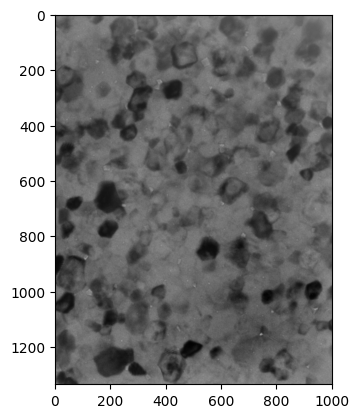

In [35]:
from data import quantile_normalization
from skimage.io import imread
import matplotlib.pyplot as plt

test_name = 'test_2'

testim = imread(test_image_path  / (test_name+'.tif') )
plt.imshow(testim, cmap="gray")
print('original min max', testim.min(), testim.max())

testim, _, _ = quantile_normalization(testim)

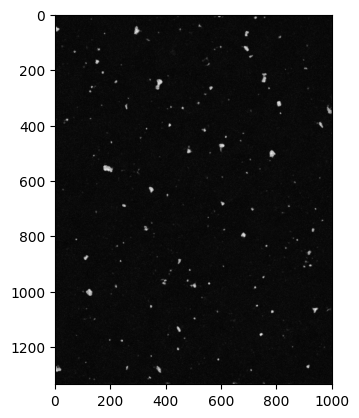

In [33]:
x = torch.from_numpy(testim).unsqueeze(0).unsqueeze(0).to(device)
y = model(x)

y = torch.nn.functional.sigmoid(y)
prediction = y.cpu().detach().numpy().squeeze()

# import scikit median filter
from scipy.ndimage import median_filter
# apply median filter
prediction_median = median_filter(prediction, size=3)

prediction_binary = (prediction_median > 0.4)
plt.imshow(prediction, cmap="gray")

In [34]:
from skimage.io import imsave
imsave(results_path / (test_name+'_pytorch_semantic_prediction.tif'), prediction)
imsave(results_path / (test_name+'_pytorch_semantic_prediction_binary.tif'), prediction_binary)

C:\Users\bnort\AppData\Local\Temp\ipykernel_12036\1748880165.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_02_06_em_pores\results\test_2.tif_pytorch_semantic_prediction_binary.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(results_path / (test_name+'_pytorch_semantic_prediction_binary.tif'), prediction_binary)
C:\Users\bnort\AppData\Local\Temp\ipykernel_12036\1748880165.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_02_06_em_pores\results\test_2.tif_pytorch_semantic_prediction_binary.tif is a low contrast image
  imsave(results_path / (test_name+'_pytorch_semantic_prediction_binary.tif'), prediction_binary)


In [29]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim, name='testim')
viewer.add_image(prediction, name='prediction')
viewer.add_image(prediction_median, name='prediction_median')
viewer.add_image(prediction_binary, name='prediction_binary')

<Image layer 'prediction_binary' at 0x1768e9d39a0>